# Reto - Inteligencia Artificial Avanzada para la ciencia de datos I

El reto de este proyecto es crear un modelo de machine learning que prediga qué pasajeros sobrevivieron en el accidente del Titanic.

**Equipo 1**



*   Frida Cano Falcón A01752953
*   Guillermo Romeo Cepeda Medina A01284015
*   Jorge Javier Sosa Briseño A01749489
*   Daniel Saldaña Rodríguez A00829752





# Introducción

El reto del curso consiste en la utilización del método CRISP-DM (Cross Industry Standard Process for Data Mining) para generar una solución que integre ciencia de datos e inteligencia artificial utilizando herramientas computacionales de vanguardia. Esto implica la obtención de una base de datos confiable que nos permita hacer un análisis de los mismos, con la finalidad de predecir una variable. En este caso, se encuentra con el reto de predecir si una persona que atendió al Titanic sobrevivió o no.

Lo primero que se realizó para empezar a solucionar el problema, fue identificar el problema, así como los requerimientos que tiene el reto y herramientas que utilizaremos para completar los requerimientos.

En primera instancia fue necesario descargar la base de datos de los pasajeros del Titanic con sus principales características, como lo es nombre, número de ticket, sexo, edad, etc.

Lo segundo fue utilizar una plataforma que permite utilizar herramientas de matemáticas, así como inteligencia artificial para darnos una mejor oportunidad de resolver el problema, así como poder trabajar en conjunto. Para esto se decidió utilizar el lenguaje de programación Python, el cuál desarrollamos en la plataforma de Google Colab, por medio de un tipo de archivo llamado Jupiter Notebook.

También se identificó que el primer paso para generar una predicción del deceso o sobrevivencia de los pasajeros del Titanic es la limpieza de la base de datos, esto debido a que se tienen variables que no aportan información útil acerca del evento que ocasionó la muerte de muchos (en específico quién entró a las barcas de emergencia y quién no).

## Librerías

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
import seaborn as sns
from sklearn.impute import KNNImputer

## Directorio

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/AI"
!ls  # show current directory

/content/gdrive/MyDrive/AI
data_titanic.csv	 test.csv
Diagrama_Modelos.drawio  tested.csv
Mod4_Hardware		 titanicequipo1-firebase-adminsdk-xhgda-c5aec8f227.json
nav2.pdf		 titanic_prueba.ipynb


# Limpieza de datos



## Extracción de datos

Se cargan los dataset, el de entrenamiento y el de testo.



In [ ]:
# Datos de entrenamiento
data_titanic = pd.read_csv("data_titanic.csv")
# Datos de testeo
data_test = pd.read_csv("test.csv")

## Características del dataset


**Metadata del dataset**

Cada columna representa las características de cada pasajero abordo del Titanic.

| Variable | Definición | Clave |
|--------------|--------------|--------------|
| survival    | sobrevivencia    | 0 = No, 1 = Sí    |
| pclass    | Tipo de clase    | 1 = 1ra, 2 = 2da, 3 = 3ra    |
| sex    | Sexo   |     |
| Age    | Edad en años    |     |
| sibsp    | Número de hermanos / esposos     |    |
| parch    | Número de padres / hijos    |     |
| ticket    | Folio de ticket    |     |
| fare    | Costo del boleto    |     |
| cabin    | Número de cabina   |     |
| embarked    | Puerto de embarcación    | C = Cherbourg, Q = Queenstown, S = Southampton   |


Notas:



*   El tipo de clase define el estatus socioeconómico.

   1ra: Clase alta

   2da: Clase media

   3ra: Calse baja
*   Edad: la edad es factorial si el pasajero tiene menos de un año.
*   Las relaciones entre familiares se definen por:

   Sibling = brother, sister, stepbrother, stepsister
   
   Spouse = husband, wife (mistresses and fiancés were ignored)

   Parent = mother, father

   Child = daughter, son, stepdaughter, stepson
   
   Some children travelled only with a nanny, therefore parch=0 for them.






In [ ]:
data_titanic.head() # Head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test.head() # Head

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



**Base de datos de entrenamiento**

Contiene los datos de 891 pasajeros

**Base de datos de testeo**

Contiene los datos de 418 pasajeros

In [ ]:
print(data_titanic.shape) # Shape
print(data_test.shape)

(891, 12)
(418, 11)


Análisis de las características de los datos: número de columnas, número de filas, valores nulos que puedan causar ruido.

In [ ]:
data_titanic.info() # DataSet information. Train file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_test.info() # DataSet information. Test file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Verificamos cuantos valores Nulos existen en la tabla.

In [ ]:
data_titanic.isnull().sum() # Null Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum()  # Null Values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Eliminamos las columas que consideramos menos importantes o no relevantes, debido a que no otrorgan información que se pueda relacionar con la supervivencia como el nombre, folio del ticket, relación con otros pasajeros.
Con esto preservamos las siguientes clases:

*    Clase socio económica, edad, sexo, monto pagado y embarcación.

In [ ]:
data_titanic = data_titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
data_titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
data_test = data_test.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
data_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


Se tomaron decisiones de limpieza, como eliminar las variables de ID, Nombre, Parch, Ticket y Cabina, ya que se consideraron no relevantes para el análisis de supervivencia en situaciones de emergencia esto con la hipótesis de que lo más determinante para saber la supervivencia es la edad, sexo y clase de los pasajeros por lo que se conoce de la prioridad que se les dio a mujeres y niños para subir a los botes salvavidas. El número de Tickets se juzgó atípico ya que solo describe un folio que lleva la cuenta de boletos vendidos y no tiene relación con la supervivencia de un pasajero.

Se decidió cambiar las variables categóricas de sexo (“sex”) y embarcamiento (“embarked”) a variables numéricas de este modo se puede realizar una relación matemática de dichas variables al ser números y no caracteres, así que se remplazó el sexo masculino por un 0 y el femenino por un 1 y la variable de embarcamiento, de ‘S’, ‘C’ y ‘Q’ a 0,1,2 respectivamente.

In [ ]:
data_titanic['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_titanic['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
data_titanic.apply (pd.to_numeric, errors='coerce')

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0.0
1,1,1,1,38.0,71.2833,1.0
2,1,3,1,26.0,7.9250,0.0
3,1,1,1,35.0,53.1000,0.0
4,0,3,0,35.0,8.0500,0.0
...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0.0
887,1,1,1,19.0,30.0000,0.0
888,0,3,1,NaN,23.4500,0.0
889,1,1,0,26.0,30.0000,1.0


In [ ]:
data_test['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_test['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
data_test.apply (pd.to_numeric, errors='coerce')

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0
...,...,...,...,...,...
413,3,0,NaN,8.0500,0
414,1,1,39.0,108.9000,1
415,3,0,38.5,7.2500,0
416,3,0,NaN,8.0500,0


Utilizamos la función de dropna() para quitar los datos no definidos de la base, puesto que estos no aportan información de las variables a analizar. Así mismo, gracias a la función dropnull() se removieron las filas que contuvieran datos nulos, esto para evitar el ruido que estas variables pueden provocar en el análisis.

In [ ]:
data_test = data_test.dropna()
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

Sacamos las métricas importantes.

In [ ]:
data_titanic.describe() # Statistics Analysis

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000


In [ ]:
data_test.describe()  # Statistics Analysis

,Pclass,Sex,Age,Fare,Embarked
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2.141994,0.383686,30.181269,40.982087,0.380665
std,0.846251,0.487019,14.104573,61.228558,0.608117
min,1.000000,0.000000,0.170000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,8.050000,0.000000
50%,2.000000,0.000000,27.000000,16.000000,0.000000
75%,3.000000,1.000000,39.000000,40.633350,1.000000
max,3.000000,1.000000,76.000000,512.329200,2.000000


## Panorama de los datos

A partir de aquí partimos de la limpieza de datos para empezar a trabajar con ellos y encontrar estadísticas que nos permitan hacer un análisis de los mismos:

Primero se realizó un conteo y porcentajes de las categorías de sexo, embarcación, hombres sobrevimientes, hombres fallecidos, mujeres sobrevivientes, mujeres fallecidas. Así como un análisis de cuartiles y quintiles de las frecuencias de las edades de los pasajeros, señalando que las edades entre 20 y 40 eran las más frecuentes. Por último se hizo un análisis de correlación para identificar qué variables están más relacionadas con otras y con sobrevivir. Encontramos que las variables más correlacionadas con la sobrevivencia es el sexo y el pasaje que se pagó.

### Cantidad de hombres y mujeres así como su embarque

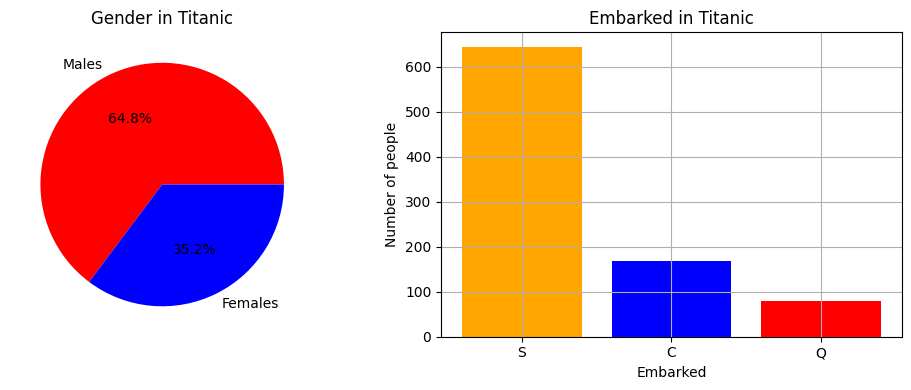

In [ ]:
# Sexo de los pasajeros
h = 0 # Hombres
m = 0 # Mujeres

# Embarque
s = 0 # Southampton
c = 0 # Cherbourg
q = 0 # Queenstown

categorias1 = ['Males', 'Females']
colores1 = ['red','blue']
categorias2 = ['S','C','Q']
colores2 = ['orange','blue','red']
for i,j in zip(data_titanic['Sex'],data_titanic['Embarked']):
  if i:
    m += 1
  else:
    h += 1
  if j == 0:
    s += 1
  elif j == 1:
    c += 1
  else:
    q = q + 1

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot de pastel - Sexo de los pasajeros
sexo = [h,m]
axes[0].pie(sexo, labels=categorias1, colors=colores1, autopct='%.1f%%')
axes[0].set_title('Gender in Titanic')

# Segundo gráfico de barras - Embarque
emb = [s,c,q]
axes[1].bar(categorias2, emb, color=colores2)
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Number of people')
axes[1].set_title('Embarked in Titanic')
axes[1].grid()
# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Mostrar los gráficos
plt.show()

### Quienes sobrevivieron y quienes no en función del sexo

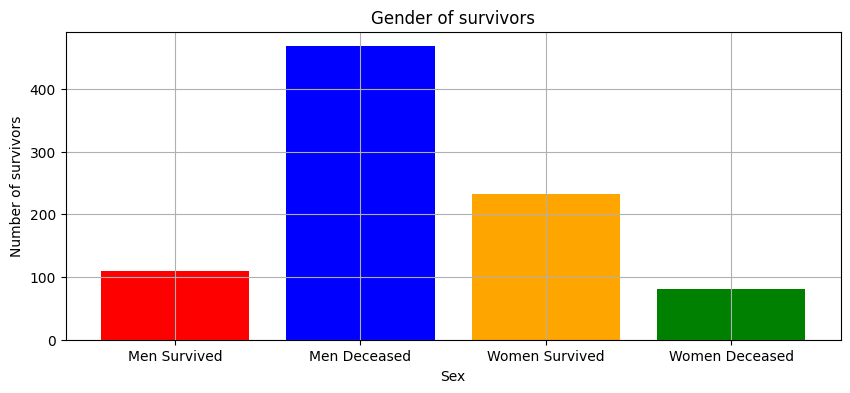

In [ ]:
category = ['Men Survived', 'Men Deceased', 'Women Survived', 'Women Deceased']
hv = 0
hm = 0
mv = 0
mm = 0
colors = ['red','blue','orange','green']
for i,j in zip(data_titanic['Sex'],data_titanic['Survived']):
  if i == 0 and j == 1:
    hv = hv + 1
  elif  i == 0 and j == 0:
    hm =hm + 1
  elif  i == 1 and j == 1:
    mv =mv + 1
  elif  i == 1 and j == 0:
    mm = mm+1
data = [hv,hm,mv,mm]
# Crear la figura con subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
# Primer gráfico de barras
axes.bar(category, data, color=colors)
axes.set_xlabel('Sex')
axes.set_ylabel('Number of survivors')
axes.set_title('Gender of survivors')
axes.grid()

### Análisis de las edades de los pasajeros.

**Sin los datos de los pasajeros que tienen edades Nulas**

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64
[ 0.42  20.125 28.    38.    80.   ]


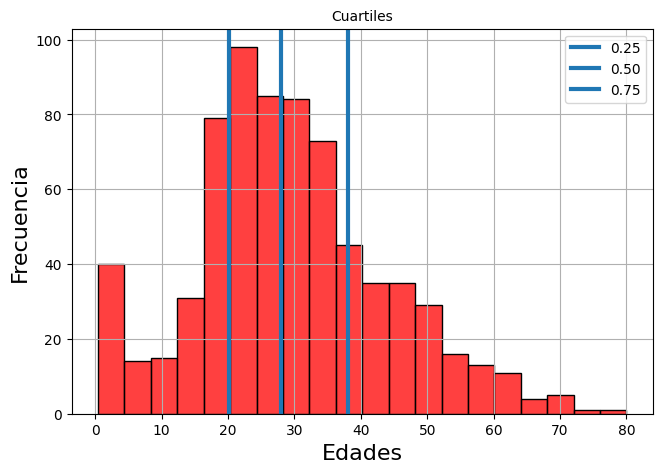






[ 0.42 19.   25.   31.8  41.   80.  ]


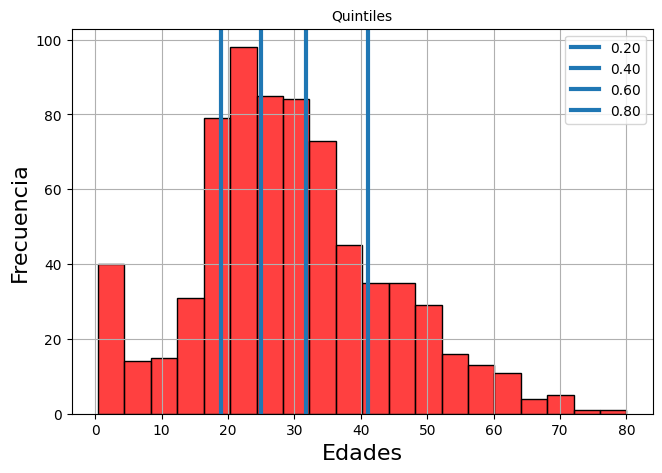

In [ ]:
# Se crea una tabla de las edades ordenadas
data = data_titanic['Age'].sort_values()
print(data)

# Se quitan los datos nulos - Se borran 177 datos
data_cleaned = data.dropna()

x = np.quantile(data_cleaned, [0, 1/3, 2/3, 1])

cuantiles = [(4, "Cuartiles"),(5, "Quintiles")]

cortes = []
for cuantil in cuantiles:
    corte = []
    valor = 0
    for i in range(cuantil[0]-1):
        valor += 1/cuantil[0]
        corte.append(valor)
    cortes.append(corte)
for i in range(len(cuantiles)):
    plt.figure(figsize=(7.5, 5))
    plt.title(cuantiles[i][1], size=10)
    plt.ylabel("Frecuencia", size=16)
    plt.xlabel("Edades", size=16)
    sns.histplot(data_titanic['Age'], bins=20, kde=False, color = "red")
    plt.grid()
    print(np.quantile(data_cleaned, [0] + cortes[i] + [1]))
    for corte in cortes[i]:
        plt.axvline(x = np.quantile(data_cleaned, corte), label="%.2f" % corte, linewidth=3)
    plt.legend()
    plt.show()
    print("\n"*4)


**Con los datos de los pasajeros que tienen edades Nulas**


Se utiliza el modelo de Vecinos para rellenar las edades Nulas

In [ ]:
# Crear un imputador KNN con el número deseado de vecinos (K)
imputer = KNNImputer(n_neighbors=2)

# Realizar la imputación en el DataFrame
imputed_data = imputer.fit_transform(data_titanic)

# Convertir los datos imputados de nuevo en un DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=data_titanic.columns)

In [ ]:
print("DataFrame original:")
print(data_titanic)
print("\nDataFrame después de la imputación KNN:")
print(imputed_df)

DataFrame original:
     Survived  Pclass  Sex   Age     Fare  Embarked
0           0       3    0  22.0   7.2500       0.0
1           1       1    1  38.0  71.2833       1.0
2           1       3    1  26.0   7.9250       0.0
3           1       1    1  35.0  53.1000       0.0
4           0       3    0  35.0   8.0500       0.0
..        ...     ...  ...   ...      ...       ...
886         0       2    0  27.0  13.0000       0.0
887         1       1    1  19.0  30.0000       0.0
888         0       3    1   NaN  23.4500       0.0
889         1       1    0  26.0  30.0000       1.0
890         0       3    0  32.0   7.7500       2.0

[891 rows x 6 columns]

DataFrame después de la imputación KNN:
     Survived  Pclass  Sex   Age     Fare  Embarked
0         0.0     3.0  0.0  22.0   7.2500       0.0
1         1.0     1.0  1.0  38.0  71.2833       1.0
2         1.0     3.0  1.0  26.0   7.9250       0.0
3         1.0     1.0  1.0  35.0  53.1000       0.0
4         0.0     3.0  0.0  35.

[ 0.42 21.   29.   38.   80.  ]


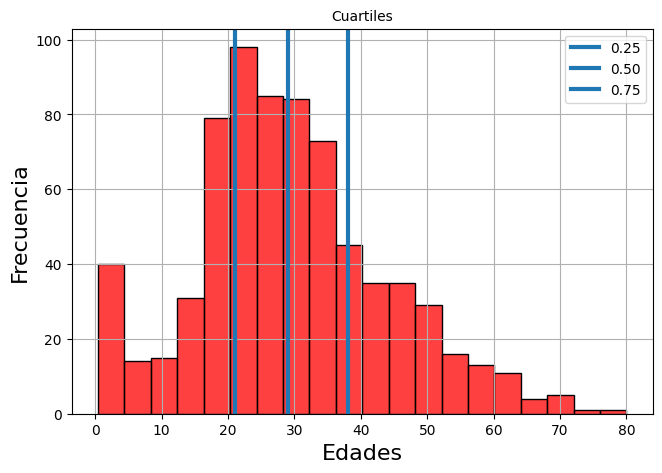






[ 0.42 19.   25.75 32.   41.   80.  ]


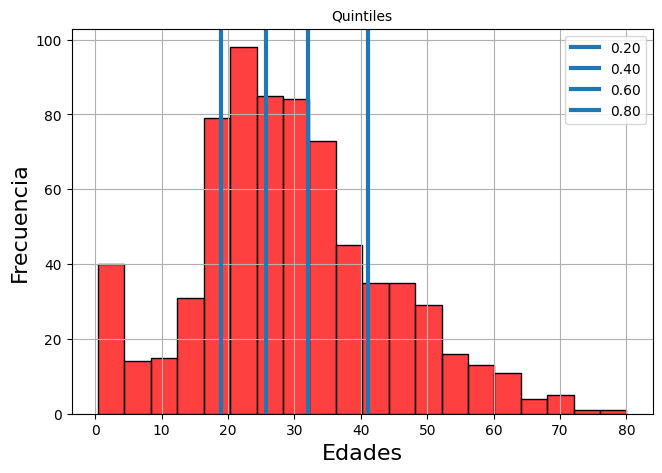

In [ ]:
# Se crea una tabla de las edades ordenadas
data_imputed = imputed_df['Age'].sort_values()

x_data = np.quantile(data_imputed, [0, 1/3, 2/3, 1])

cuantiles = [(4, "Cuartiles"),(5, "Quintiles")]

cortes = []
for cuantil2 in cuantiles:
    corte = []
    valor = 0
    for i in range(cuantil2[0]-1):
        valor += 1/cuantil2[0]
        corte.append(valor)
    cortes.append(corte)
for i2 in range(len(cuantiles)):
    plt.figure(figsize=(7.5, 5))
    plt.title(cuantiles[i2][1], size=10)
    plt.ylabel("Frecuencia", size=16)
    plt.xlabel("Edades", size=16)
    sns.histplot(data_titanic['Age'], bins=20, kde=False, color = "red")
    plt.grid()
    print(np.quantile(data_imputed, [0] + cortes[i2] + [1]))
    for corte2 in cortes[i2]:
        plt.axvline(x = np.quantile(data_imputed, corte2), label="%.2f" % corte2, linewidth=3)
    plt.legend()
    plt.show()
    print("\n"*4)

<ipython-input-26-83693a18fc29>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_titanic['Age'], shade=True)
<ipython-input-26-83693a18fc29>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(imputed_df['Age'], shade=True)


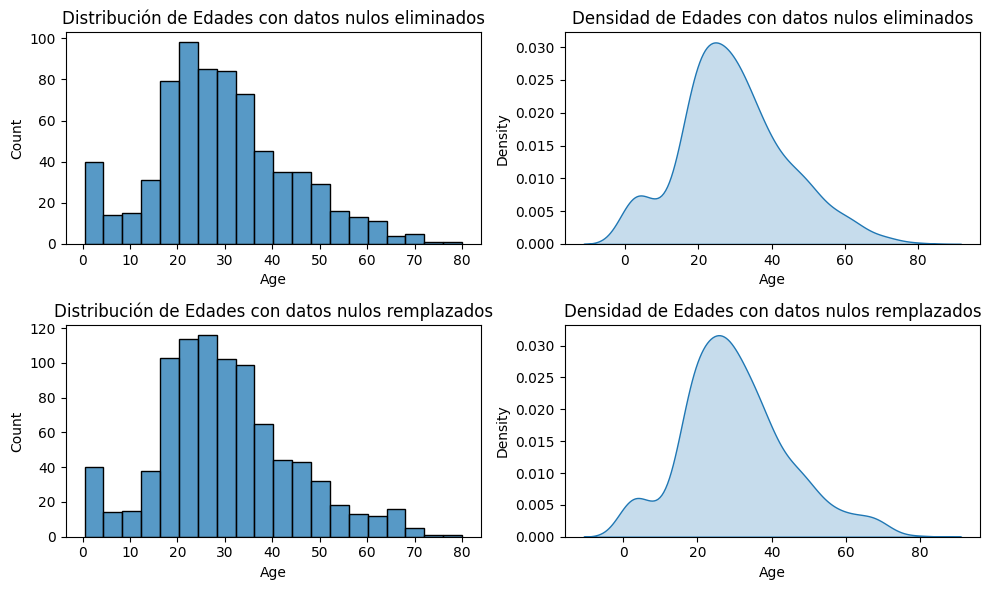

In [ ]:
# Crear una figura con dos subplots
plt.figure(figsize=(10, 6))

# ----- Data frame sin datos nulos -----
# Histograma de la distribución de edades
plt.subplot(2, 2, 1)  # 1 fila, 2 columnas, primer subplot
sns.histplot(data_titanic['Age'], bins=20, kde=False)
plt.title('Distribución de Edades con datos nulos eliminados')

# Gráfico de densidad de la distribución de edades
plt.subplot(2, 2, 2)  # 1 fila, 2 columnas, segundo subplot
sns.kdeplot(data_titanic['Age'], shade=True)
plt.title('Densidad de Edades con datos nulos eliminados')

# ----- Data frame con datos nulos remplazados -----
# Histograma de la distribución de edades
plt.subplot(2, 2, 3)  # 1 fila, 2 columnas, primer subplot
sns.histplot(imputed_df['Age'], bins=20, kde=False)
plt.title('Distribución de Edades con datos nulos remplazados')

# Gráfico de densidad de la distribución de edades
plt.subplot(2, 2, 4)  # 1 fila, 2 columnas, segundo subplot
sns.kdeplot(imputed_df['Age'], shade=True)
plt.title('Densidad de Edades con datos nulos remplazados')

plt.tight_layout()
plt.show()

### Análisis de correlación para identificar qué variables están más ligadas a sobrevivir

La tabla de correlación muestra una relación importante (cercana al 1) entre el sexo y la clase con la sobrevivencia. Por otro lado, en cuanto a la edad, no se ve la relación fuerte esperada al tener una relación del 9% aproximadamente.


*   Database eliminando los pasajeros con edades nulas.



<Axes: >

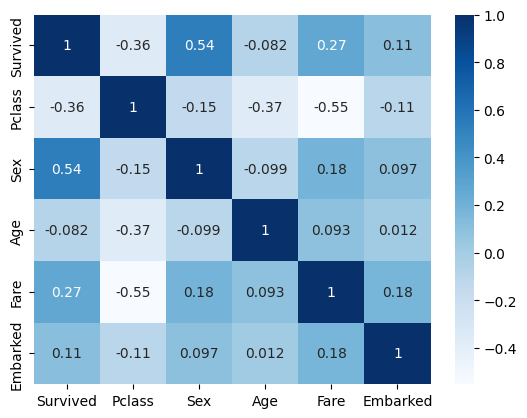

In [ ]:
df = data_titanic
df_NonNull = df.dropna()
df_NonNull.isnull().sum()
corr_nonull = df_NonNull.corr()
sb.heatmap(corr_nonull, cmap = 'Blues', annot = True)



*   Database con edades supuestas, por lo tanto se conservan los 891 datos



<Axes: >

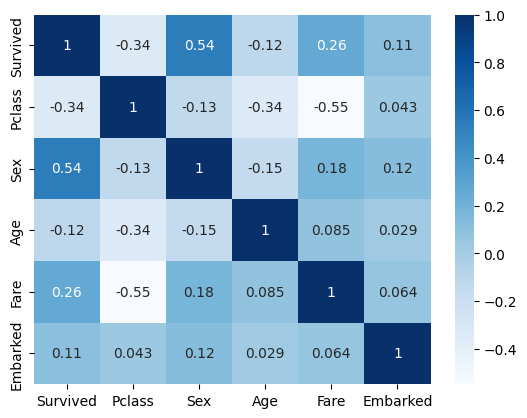

In [ ]:
corr_imputed = imputed_df.corr()
sb.heatmap(corr_imputed, cmap = 'Blues', annot = True)

Se encontrón en la limpieza y análisis que hay una fuerte correlación entre el sexo y la sobrevivencia, además de una correlación entre el pasaje y la sobrevivencia. Esto es de esperarse dado que en emergencias, las personas más cercanas a las salidas son más propensas a sobrevivir, en este caso, la clase que pagó más, estaba en un lugar más cercano a los botes salvavidas, así como también se procuraron mujeres y niños en esta situación.

En lo que respecta a la edad, el hecho de no mostrar relación fuerte con la sobrevivencia fue desconcertante, se sospecha que la supresión de los pasajeros con datos nulos pudo provocar resultados alejados de la realidad (falsos). Por ello, se realizará otro análisis en el cual se dejarán los datos de los pasajeros eliminados en esta limpieza, agregando una variable que aproxime las edades de dichos pasajeros y ver la nueva correlación.

# Modelación


En esta etapa, se presenta el proceso seguido en el proyecto, centrándose en la generación y comparación de modelos de aprendizaje máquina para abordar el reto planteado. En esta fase, se exploran diferentes tipos y configuraciones de modelos con el objetivo de seleccionar los más efectivos, cuyas decisiones se detallarán en la documentación. Para esto se hizo una investigación acerca de los modelos de clasificación, se encontraron varios modelos que cumplen con las características de nuestros datos para predecir de manera binaria un resultado, en nuestro caso la predicción de la muerte de un individuo en el Titanic. Entre estos modelos, se seleccionaron: KNeighborsClassifier, Support Vector Classifier (SVC), LogisticRegression, DecisionTreeClassifier, GaussianNB, RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier, MLPClassifier.

Entre estos modelos, se tiene la intención de seleccionar sólo tres modelos, por lo que se realizó un proceso para seleccionar el modelo que será explicado en el documento, así mismo se documentó el proceso para la preparación de datos para cada modelo, así como la separación del dataset para entrenar y predecir. A continuación se describe el proceso de la selección e implementación de los modelos.

## Librerías de modelos

La continuación del proyecto viene después de la limpieza de datos que se realizó en el entregable pasado, el siguiente paso fue investigar los modelos de predicción que nos interesan.

K-Neighbors Classifier: Utiliza el método de vecinos más cercanos para la clasificación. Las predicciones se basan en las clases de los ejemplos cercanos en el espacio de características. Requiere ajustar el número de vecinos y posiblemente otras métricas de distancia.

SVC (Support Vector Classifier): Un clasificador que encuentra un hiperplano de separación óptimo entre clases. Puede usar diferentes funciones de kernel para transformar los datos en un espacio de mayor dimensión. Es útil para problemas de clasificación lineal y no lineal.

Logistic Regression: Realiza la clasificación utilizando la función logística para modelar la probabilidad de pertenencia a una clase. Es efectivo para problemas de clasificación binaria y multiclase cuando las clases son linealmente separables.

Decision Tree Classifier: Construye un árbol de decisión que divide recursivamente el espacio de características en regiones más puras. Es fácilmente interpretable, pero puede ser propenso al sobreajuste si no se controla adecuadamente.

Gaussian NB: Implementa el clasificador Bayesiano Ingenuo Gaussiano, asumiendo que las características son independientes y distribuidas normalmente. A pesar de su simplicidad, puede funcionar sorprendentemente bien en muchos casos.

Random Forest Classifier: Crea múltiples árboles de decisión y combina sus predicciones para mejorar la robustez y precisión del modelo. Puede manejar características categóricas y numéricas, y es menos propenso al sobreajuste que un solo árbol.

Gradient Boosting Classifier: Construye una secuencia de modelos que corrigen los errores del modelo anterior. Es útil para problemas de clasificación y regresión, y tiende a producir modelos de alta calidad.

Decision Tree Classifier: Construye un árbol de decisión que divide recursivamente el espacio de características en regiones más puras. Es fácilmente interpretable, pero puede ser propenso al sobreajuste si no se controla adecuadamente.

Multi-layer Perceptron Classifier (MLP): Este clasificador implementa el algoritmo de aprendizaje profundo supervisado MLP que se entrena mediante el método de retropropagación (backpropagation) está compuesto por múltiples capas de neuronas: capas de entrada, capas ocultas y capas de salida, cada una conectada a través de conexiones ponderadas (Neural network models (supervised), s. f.). Se escogió este modelo para realizar la predicción de los decesos en el titanic debido a su popularidad actual en la sociedad, puesto que este modelo es la base de las nuevas tecnologías que estamos usando como la nueva

La librería cross_val_score se utiliza  para generalizar los análisis con gráficas y predicciones, así como se importa accuracy_score y metrics para obtener información de nuestros modelos y predicciones

In [ ]:
#Librería Separar dataset
from sklearn.model_selection import train_test_split

#Librerías para Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


#Se usa en la función que no hemos usado todavía en el proyecto
from sklearn.model_selection import cross_val_score
#Librerías para realizar un análisis de la implementación del modelo
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Modelando

Después de seleccionar lo mejores modelos para cada modelo se realizaron diferentes pruebas utilizando diferentes hiperparámetros y utilizando dos bases de datos diferentes: una en donde eliminamos los pasajeros que contienen datos nulos y otra en donde a través del algoritmo de K-vecinos predecimos los valores nulos para no eliminar dichos datos. Para cada modelo se hicieron tres pruebas con diferentes híper parámetros para encontrar el mejor rendimiento.

### Modelos utilizando base de datos sin valores nulos

In [ ]:
#Separamos tipos de variables en dependientes e independientes
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
X_NonNull = df_NonNull[feature_names] # variables predictoras
y_NonNull = df_NonNull['Survived']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_NonNull_train, X_NonNull_test, y_NonNull_train, y_NonNull_test = train_test_split(X_NonNull, y_NonNull, test_size=0.2, random_state=42, stratify=y_NonNull)

In [ ]:
#Se implementa una array de tuplas de las funciones a utilizar con sus respectivos modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

In [ ]:
#Aquí se utiliza un ciclo para preparar, , entrenar y predecir cada uno de nuestros modelos que importamos, además se hace un análisis de precisión con la librería accuray_score
names = []
scores = []
for name, model in models:
    model.fit(X_NonNull_train, y_NonNull_train)
    y_NonNull_pred = model.predict(X_NonNull_test)
    scores.append(accuracy_score(y_NonNull_test, y_NonNull_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.776224
1  SVC  0.608392
2   LR  0.769231
3   DT  0.783217
4  GNB  0.755245
5   RF  0.783217
6   GB  0.818182
7  MLP  0.783217


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Gradient Boosting

Prueba de parámetros 1

In [ ]:
#Se selecciona el modelo que mejores métricas nos dió y se hace un ajuste de hyper-parámetros para mejorar los resultados
#Se implementa el modelo completamente
#Se llama la función con un learning_rate de 0.01
GB = GradientBoostingClassifier(learning_rate=0.01, subsample=0.6)
#Se ajustan los datos al modelo
GB.fit(X_NonNull_train, y_NonNull_train)

#Se predice el modelo
y_NonNull_pred = GB.predict(X_NonNull_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


Prueba de parámetros 2

Accuracy: 0.7692307692307693
Precision: 0.7954545454545454
Recall: 0.8235294117647058
Fone: 0.8092485549132947


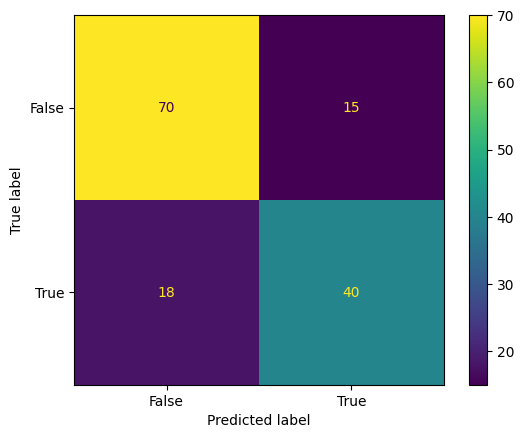

In [ ]:
#cambio de hyper parámtetros #2
GB = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5)
#Se ajustan los datos al modelo
GB.fit(X_NonNull_train, y_NonNull_train)

#Se predice el modelo
y_NonNull_pred = GB.predict(X_NonNull_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


Prueba de paråmetros #3

Accuracy: 0.8111888111888111
Precision: 0.7959183673469388
Recall: 0.9176470588235294
Fone: 0.8524590163934426


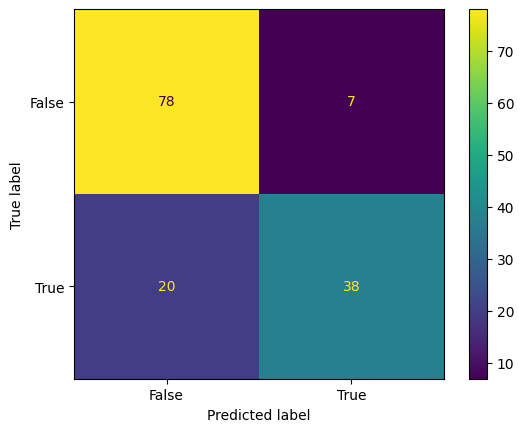

In [ ]:
#cambio de hyper parámtetros #3
GB = GradientBoostingClassifier(learning_rate=0.02, subsample=0.9)
#Se ajustan los datos al modelo
GB.fit(X_NonNull_train, y_NonNull_train)

#Se predice el modelo
y_NonNull_pred = GB.predict(X_NonNull_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Text(0, 0.5, 'Feature Importance Score')

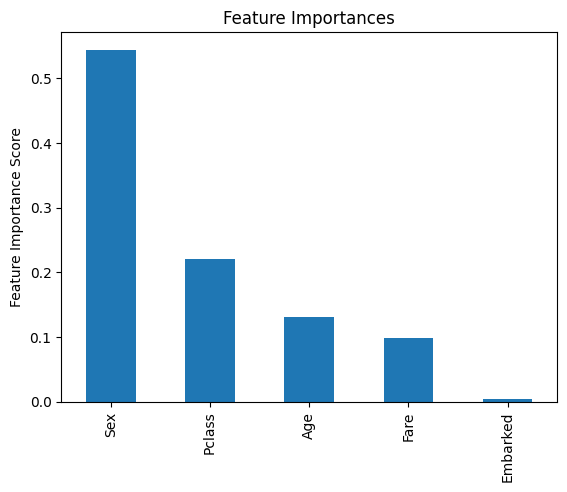

In [ ]:
#Se implemnta una gráfica de importancia de cada una de las variables para su predicción, podriámos descartar la variable "Embarked" según la gráfica
feat_imp = pd.Series(GB.feature_importances_, feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
#En las siguientes líneas se hizo el intento de mejorar los falsos positivos del modelo, pero no tuvimos éxito en mejorar el modelo
# print(y_pred)
# accuracy_score(y_test, y_pred)
# #GB.predict_proba(X_test)
# y_pred2 = (GB.predict_proba(X_test)[:,1] >= 0.45).astype(bool)
# y_pred2 = y_pred2 * 1
# print(y_pred2)
# accuracy_score(y_test, y_pred2)

#### Xtreme Gradient Boosting

In [ ]:
import xgboost as xgb

Prueba de parámetros #1

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting
xGB = xgb.XGBClassifier(learning_rate = 0.08, subsample = 0.5, min_child_weight = 1.5, reg_alpha = 2.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Se puede apreciar que el modelo subió exactitud, así como presición de los datos

prueba de parámetros 2

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting
#Cambios en parámetros #2
xGB = xgb.XGBClassifier(learning_rate = 0.05, subsample = 0.8, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Prueba de parámetros 3

Accuracy: 0.8391608391608392
Precision: 0.8522727272727273
Recall: 0.8823529411764706
Fone: 0.8670520231213872


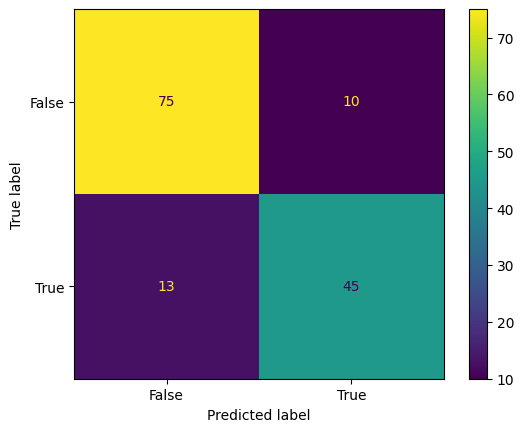

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting

xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Red Neuronal - MLP Classifier

Prueba 1

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_NonNull_train, y_NonNull_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_NonNull_test, y_NonNull_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7342657342657343


Prueba 2

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(150, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_NonNull_train, y_NonNull_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_NonNull_test, y_NonNull_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7762237762237763


Prueba 3

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_NonNull_train, y_NonNull_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_NonNull_test, y_NonNull_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7622377622377622


#### Regularización en Árboles de Decisión

Prueba 1

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_NonNull_train, y_NonNull_train)
regularized_tree_score = regularized_tree.score(X_NonNull_test, y_NonNull_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.8181818181818182


Prueba 2

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_NonNull_train, y_NonNull_train)
regularized_tree_score = regularized_tree.score(X_NonNull_test, y_NonNull_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.7622377622377622


Prueba 3

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_NonNull_train, y_NonNull_train)
regularized_tree_score = regularized_tree.score(X_NonNull_test, y_NonNull_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.7272727272727273


### Modelos utilizando la base de datos preservando los valores nulos

In [ ]:
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
X_imputed = imputed_df[feature_names] # variables predictoras
y_imputed = imputed_df['Survived']    # variable de respuesta
X_imputed_train, X_imputed_test, y_imputed_train, y_imputed_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42, stratify=y_imputed)

#### Gradient Boosting

Prueba metadatos #1

Accuracy: 0.7877094972067039
Precision: 0.7686567164179104
Recall: 0.9363636363636364
Fone: 0.8442622950819673


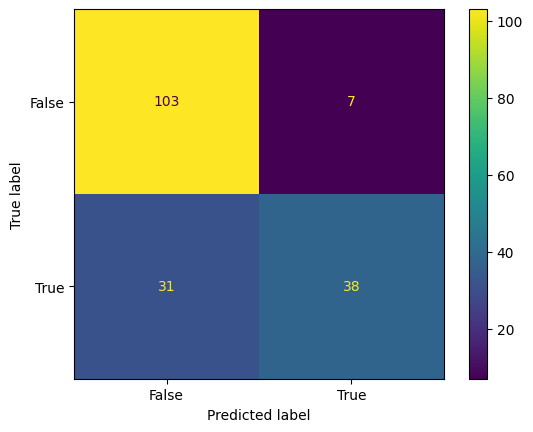

In [ ]:
#Se selecciona el modelo que mejores métricas nos dió y se hace un ajuste de hyper-parámetros para mejorar los resultados
#Se implementa el modelo completamente
#Se llama la función con un learning_rate de 0.01
GB = GradientBoostingClassifier(learning_rate=0.01, subsample=0.6)
#Se ajustan los datos al modelo
GB.fit(X_imputed_train, y_imputed_train)

#Se predice el modelo
y_imputed_pred = GB.predict(X_imputed_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Prueba Metadatos #2

Accuracy: 0.8044692737430168
Precision: 0.8048780487804879
Recall: 0.9
Fone: 0.8497854077253219


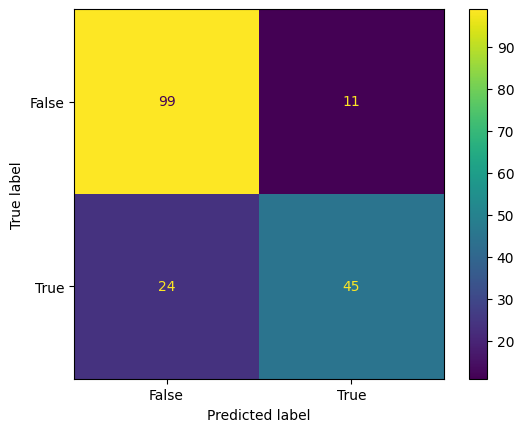

In [ ]:
#Se selecciona el modelo que mejores métricas nos dió y se hace un ajuste de hyper-parámetros para mejorar los resultados
#Se implementa el modelo completamente
#Se llama la función con un learning_rate de 0.01
GB = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5)
#Se ajustan los datos al modelo
GB.fit(X_imputed_train, y_imputed_train)

##Se predice el modelo
y_imputed_pred = GB.predict(X_imputed_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Prueba Metadatos #3

Accuracy: 0.7877094972067039
Precision: 0.7727272727272727
Recall: 0.9272727272727272
Fone: 0.8429752066115703


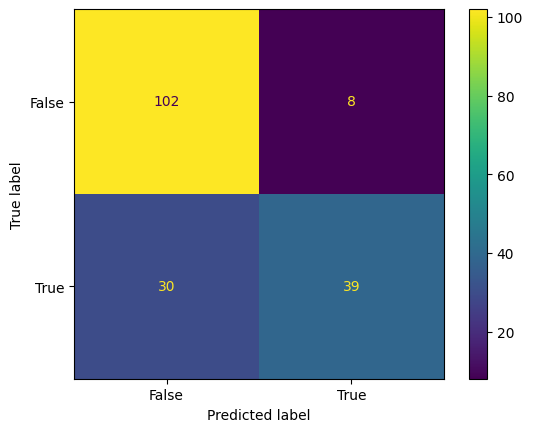

In [ ]:
#Se selecciona el modelo que mejores métricas nos dió y se hace un ajuste de hyper-parámetros para mejorar los resultados
#Se implementa el modelo completamente
#Se llama la función con un learning_rate de 0.01
GB = GradientBoostingClassifier(learning_rate=0.02, subsample=0.9)
#Se ajustan los datos al modelo
GB.fit(X_imputed_train, y_imputed_train)

#Se predice el modelo
y_imputed_pred = GB.predict(X_imputed_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
#Se imprimen las variables obtenidas de la matríz
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Xtreme Gradiend Boosting

Prueba metadatos #1



Accuracy: 0.7988826815642458
Precision: 0.8032786885245902
Recall: 0.8909090909090909
Fone: 0.8448275862068965


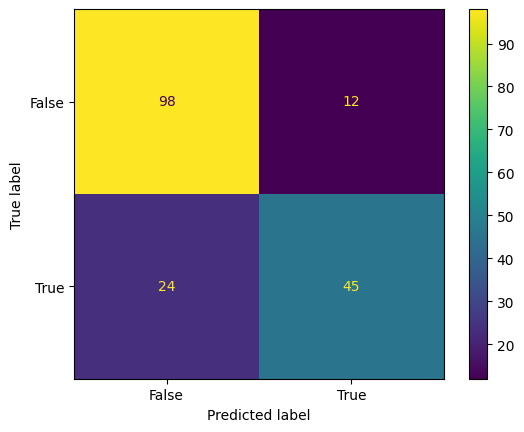

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting
xGB = xgb.XGBClassifier(learning_rate = 0.08, subsample = 0.5, min_child_weight = 1.5, reg_alpha = 2.5)
xGB.fit(X_imputed_train, y_imputed_train)
y_imputed_pred = xGB.predict(X_imputed_test)
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


Prueba metadatos #2


Accuracy: 0.7932960893854749
Precision: 0.8016528925619835
Recall: 0.8818181818181818
Fone: 0.8398268398268398


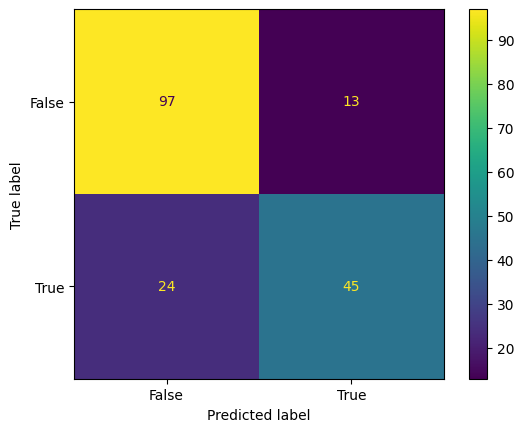

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting
xGB = xgb.XGBClassifier(learning_rate = 0.05, subsample = 0.8, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_imputed_train, y_imputed_train)
y_imputed_pred = xGB.predict(X_imputed_test)
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Prueba metadatos #3

Accuracy: 0.8044692737430168
Precision: 0.8048780487804879
Recall: 0.9
Fone: 0.8497854077253219


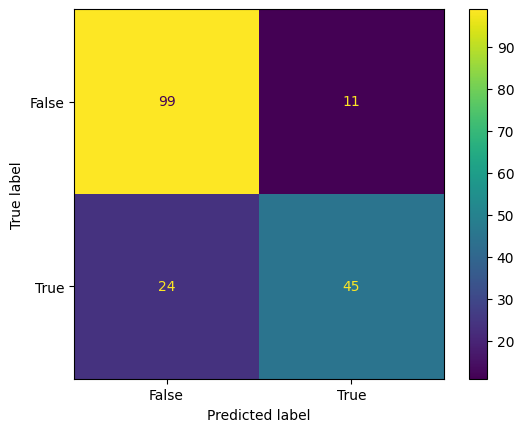

In [ ]:
#En esta sección se realizó el mismo proceso que en GradientBoosting para ajustar los hyper-parámetros, pero con el modelo Xtreme Gradient Boosting
xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_imputed_train, y_imputed_train)
y_imputed_pred = xGB.predict(X_imputed_test)
confusion_matrix = metrics.confusion_matrix(y_imputed_test, y_imputed_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Red Neuronal - MLP Classifier


Prueba 1

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_imputed_train, y_imputed_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_imputed_test, y_imputed_test)
print("MLP Score:", mlp_score)

MLP Score: 0.770949720670391


Prueba 2

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(150, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_imputed_train, y_imputed_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_imputed_test, y_imputed_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7486033519553073


Prueba 3

In [ ]:
#Se crea una variable de red neuronal para clasificación, con parámetros de 100 capas ocultas y una iteración máxima de 10000
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)  # Capas y Parámetros
#Se ajustan los datos
mlp_model.fit(X_imputed_train, y_imputed_train)
#Se calcula una puntuación de la red neuronal
mlp_score = mlp_model.score(X_imputed_test, y_imputed_test)
print("MLP Score:", mlp_score)

MLP Score: 0.7430167597765364


#### Regularización de árbol de desición

Prueba 1

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_imputed_train, y_imputed_train)
regularized_tree_score = regularized_tree.score(X_imputed_test, y_imputed_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.7877094972067039


Prueba 2

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_imputed_train, y_imputed_train)
regularized_tree_score = regularized_tree.score(X_imputed_test, y_imputed_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.8212290502793296


Prueba 3

In [ ]:
#Se crea una variable para rugularizar los datos con DesicionTreeClasifier
regularized_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=5)  # Configura los parámetros
#Se ajustan los datos
regularized_tree.fit(X_imputed_train, y_imputed_train)
regularized_tree_score = regularized_tree.score(X_imputed_test, y_imputed_test)
print("Regularized Tree Score:", regularized_tree_score)

Regularized Tree Score: 0.8324022346368715


### Resultados

Se determinaron pues las variables dependientes e independientes de la base de datos así como los datos de entrenamiento y los de testeo.

Después se crea un array de modelos el cuál tiene la función de almacenar los modelos para utilizar un ciclo para preparar, entrenar y predecir cada uno de nuestros modelos que importamos, además se hace un análisis de precisión con la librería accuracy score.

A continuación presentamos los scores de los modelos:

* K-Neighbors Classifier - KNN : 0.643357
* Support Vector Classifier - SVC : 0.671329
* Logistic Regression - LR : 0.755245
* Decision Tree Classifier - DT : 0.713287
* Gaussian NB - GNB 0.755245
* Random Forest Classifie - RF 0.769231
* Gradient Boosting Classifier - GB 0.783217
* Multi-Layer Perceptron Classifier - MLP 0.762238

Se puede apreciar que los modelos con mejor precisión son: Gradient Boosting, Multi-Layer Perceptron y Decision Tree Classifier, por lo que serán uno de los modelos que se utilizaran para hacer el análisis y predicción. Sin embargo, se harán algunos cambios en las parámetros para mejorar los resultados de la predicción.

Una vez determinados los mejores modelos, se realizaron tres pruebas por modelo de aprendizaje para cada base de datos.

A continuación se presentan los mejores resultados de precisión obtenidos en cada modelo:

|  | Eliminando los valores nulos  | Preservando los valores nulos |
| ------------- | ------------- | ------------- |
| Gradient Boosting  | 0.82 | 0.78 |
| Xtreme Gradient Boosting  | 0.84  | 0.80  |
| Multi-Layer Perceptron  | 0.76  | 0.79  |
| Decision Tree | 0.82  | 0.84  |

En específico, en Gradient Boosting tomamos los mejores hyperparámetros e hicímos un análisis de significancia de las variables como input, y nos entregó la siguiente gráfica, este nos dá a entender que no necesitamos la variable de enbarking, ya que no parece tener relación con el resultado de decesos.

Vemos que los resultados son diferentes de acuerdo con la base de datos utilizada, sin embargo no se ve un patrón preciso que determine que una base es mejor que otra, solamente que en la mayoría de los modelos la base de datos en la que se preservan los datos con valores nulos predichos la precisión de los modelos es mayor. Así mismo se puede notar que el clasificador de árbol de decisión es el que tiene mayor precisión.

A lo largo de esta entrega, se ha llevado acabo un proceso exhaustivo de selección, implementación y comparación de modelos de aprendizaje automático con el fin de lograr el objetivo de predecir la supervivencia de los pasajeros en el Titanic. En el transcurso de esta fase, se estudiaron una variedad de algoritmos de clasificación y se evaluaron en diferentes configuraciones para determinar cuales ofrecen el mejor rendimiento en materia de las métricas de evaluación.

Entre el conjunto de los modelos analizados, destacaron dos enfoques particulares: el algoritmo Xtreme Gradient Boosting (XGBoost) y el uso de redes neuronales a través del Multi-Layer Perceptron Classifier (MLP). Ambos métodos demostraron resultados prometedores en términos de precisión, recall y F1-Score. El algoritmo XGBoost, que implementa un sistema de decisiones basado en árboles, se resaltó por su capacidad para manejar conjuntos de datos complejos y generar predicciones precisas. En contraste, la red neuronal MLP mostró una capacidad para aprender patrones en los datos y adaptarse a relaciones no lineales, lo que contribuyó a su alto rendimiento.

Es importante mencionar que, los mejores rendimientos encontrados en los modelos fueron extremadamente mejores cuando se trabajó con los datos que no contenían valores nulos. La eliminación de registros con datos faltantes permitió a los modelos centrarse en relaciones significativas en los datos disponibles y generar predicciones más precisas. Así mismo, se experimentó con diferentes valores de hiper-parámetros y técnicas de regularización. Las iteraciones constantes permitieron identificar combinaciones óptimas que maximizaron la precisión y la generalización de los modelos.

# Prueba cambio bases de datos


In [ ]:
from xgboost import plot_importance

In [ ]:
#Separamos tipos de variables en dependientes e independientes
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']
X_NonNull = df_NonNull[feature_names] # variables predictoras
y_NonNull = df_NonNull['Survived']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_NonNull_train, X_NonNull_test, y_NonNull_train, y_NonNull_test = train_test_split(X_NonNull, y_NonNull, test_size=0.2, random_state=42, stratify=y_NonNull)

Accuracy: 0.8391608391608392
Precision: 0.8522727272727273
Recall: 0.8823529411764706
Fone: 0.8670520231213872


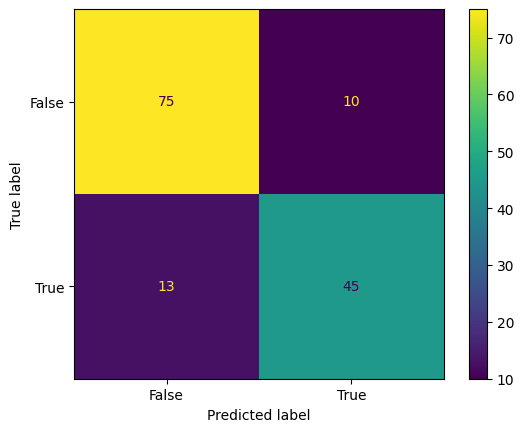

In [ ]:
xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Text(0, 0.5, 'Feature Importance Score')

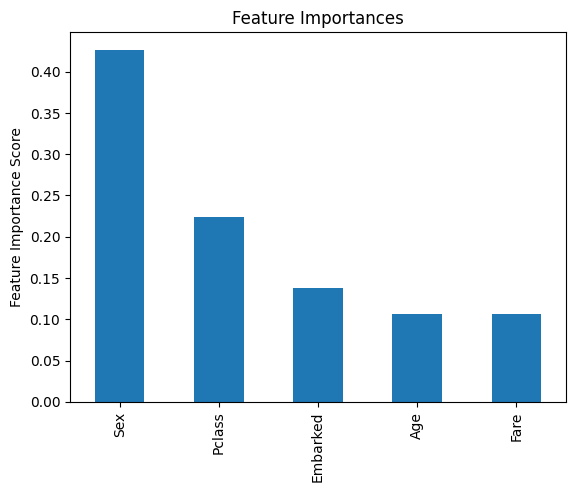

In [ ]:
feat_imp = pd.Series(xGB.feature_importances_, feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

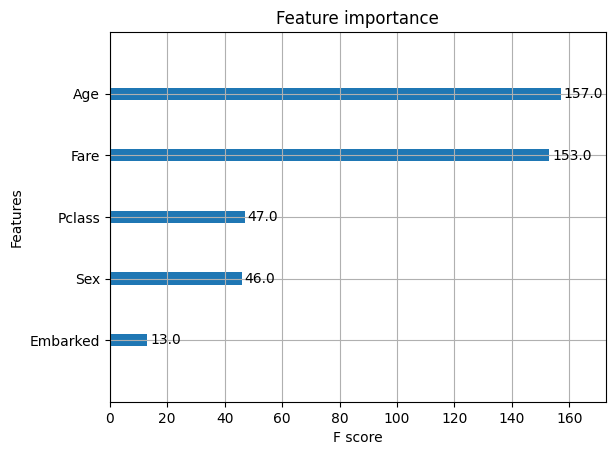

In [ ]:
plot_importance(xGB)

## Sin Embarked

In [ ]:
#Separamos tipos de variables en dependientes e independientes
feature_names = ['Age', 'Sex', 'Pclass', 'Fare']
X_NonNull = df_NonNull[feature_names] # variables predictoras
y_NonNull = df_NonNull['Survived']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_NonNull_train, X_NonNull_test, y_NonNull_train, y_NonNull_test = train_test_split(X_NonNull, y_NonNull, test_size=0.2, random_state=42, stratify=y_NonNull)

Accuracy: 0.8391608391608392
Precision: 0.8444444444444444
Recall: 0.8941176470588236
Fone: 0.8685714285714287


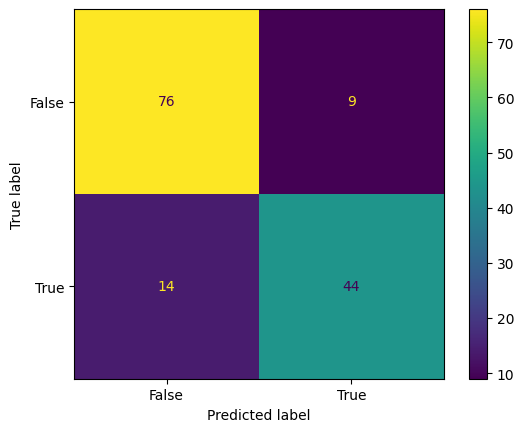

In [ ]:
xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Sin fare

In [ ]:
#Separamos tipos de variables en dependientes e independientes
feature_names = ['Age', 'Sex', 'Pclass', 'Embarked']
X_NonNull = df_NonNull[feature_names] # variables predictoras
y_NonNull = df_NonNull['Survived']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_NonNull_train, X_NonNull_test, y_NonNull_train, y_NonNull_test = train_test_split(X_NonNull, y_NonNull, test_size=0.2, random_state=42, stratify=y_NonNull)

Accuracy: 0.8391608391608392
Precision: 0.8369565217391305
Recall: 0.9058823529411765
Fone: 0.8700564971751413


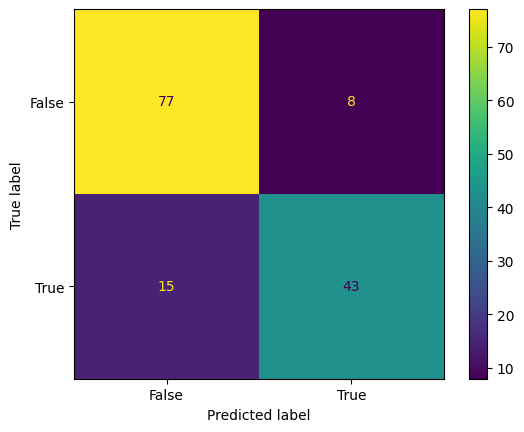

In [ ]:
xGB = xgb.XGBClassifier(learning_rate = 0.1, subsample = 0.2, min_child_weight = 2, reg_alpha = 1.5)
xGB.fit(X_NonNull_train, y_NonNull_train)
y_NonNull_pred = xGB.predict(X_NonNull_test)
confusion_matrix = metrics.confusion_matrix(y_NonNull_test, y_NonNull_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Firebase

In [ ]:
# Importamos las variables
edad = "21"
clase = "1"
enb = "Queenstown"
sexo = "Mujer"
fare = 0

In [ ]:
# String a Int
edad = int(edad)
clase = int(clase)

In [ ]:
if clase == 1:
  fare = 84.1546875
elif clase == 2:
  fare = 20.66218
else:
  fare = 13.675550101832993

In [ ]:
if sexo == "Hombre":
  sexo = 0
else:
  sexo = 1

In [ ]:
if enb == "Southampton":
  enb = 0
elif enb == "Cherbourg":
  enb = 1
else:
  enb = 2

In [ ]:
pas = {'Age': [edad], 'Sex': [sexo], 'Pclass': [clase], 'Embarked': [enb], 'Fare': [fare]}

In [ ]:
df_pas = pd.DataFrame(data = pas)

In [ ]:
pred = regularized_tree.predict(df_pas)

In [ ]:
pred = pred[0]
if pred == 1:
  res = "Sobrevivió"
else:
  res = "No sobrevivió"